# Importing required Modules and Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Loading the Red Wine Dataset

In [5]:
#importing the red wine dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv(r'C:\Users\Sony\Desktop\Wine_Quality_Red.csv')

checking the first five rows of the dataset in order to get general idea of features and variables.

checking the input variables and output variables.
 
the head() function used to view the preview of the data for given number of rows,if no value is given then bydefault it will display first five rows.

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploring the Dataset

Once the importing of the dataset is done,we get the rough idea of the dataset as below--
this dataset contains features necessary to check the quality of the red wine.
so here "quality" is the dependent or output variable.
it is the time to make complete "Exploratory Data Analysis i.e. EDA"
Let's start it with checking the number of rows and columns in the given Dataset-->

In [38]:
df.shape

(1599, 12)

this dataset contains 1599 rows and 12 columns.
Now lets check the name of all the columns this dataset have so that it is easy for us to --
--view the names of columns in easier way and make further analysis on them-->

In [39]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In the above output we can clearly see the names of all columns.
now by observing the dataset and column names it is clear that feature "quality" is dependent--
--variable and all other features are independent.
For further analysis we have to check the datatypes of values of each column-->

In [40]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Checking the Missing Values in Dataset

from above output,it is clearly visible that all the values of each column are either float type--
or integer type.
one thing to be noticed here is that only output variable is in integer type ,all other variables--
--are in float type.
Now lets check for sum of the missing values in each column-->

In [41]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

that's great ,we have no null values in the given dataset,it makes our job easy...isn't it?

# Statistical summary of the Dataset


now lets see the summary of the statistics of the dataset pertaining to the dataset columns,
like mean,median,mode,standard deviation and IQR values.
as the whole dataset is numeric so no need to worry for the dropping of any column as below function-
--only works on numerical data.

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Renaming of the columns to remove the spaces between the names of columns.

In [43]:
df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking for outliers in Dataset

if we go through above satistics ,then in "total sulfer dioxide" column the value of mean and max is
different with high values.

So we will check through Boxplot if any outlier present in this column?

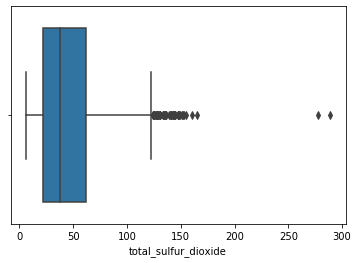

In [44]:
sns.boxplot(df.total_sulfur_dioxide)

As we clearly see above that in the column "total_sulfur_dioxide" outliers are present.

Lets check Z-Score for the given dataset to check the score that expresses the value of a distribution in standard deviation with respect to the mean.

In [45]:
#import necessary modules/Library for checking Z Score of the dataset

from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))

In [47]:
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


From above values it is seen that the outliers present in the "total_sulfur_dioxide"  column are not 
making very big difference in the value of standard deviation in z score values so right now no need
to remove outliers through this method.We will standardized
the given data in later part.

# Checking the Skewness of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C93032BBA8>,
      dtype=object)

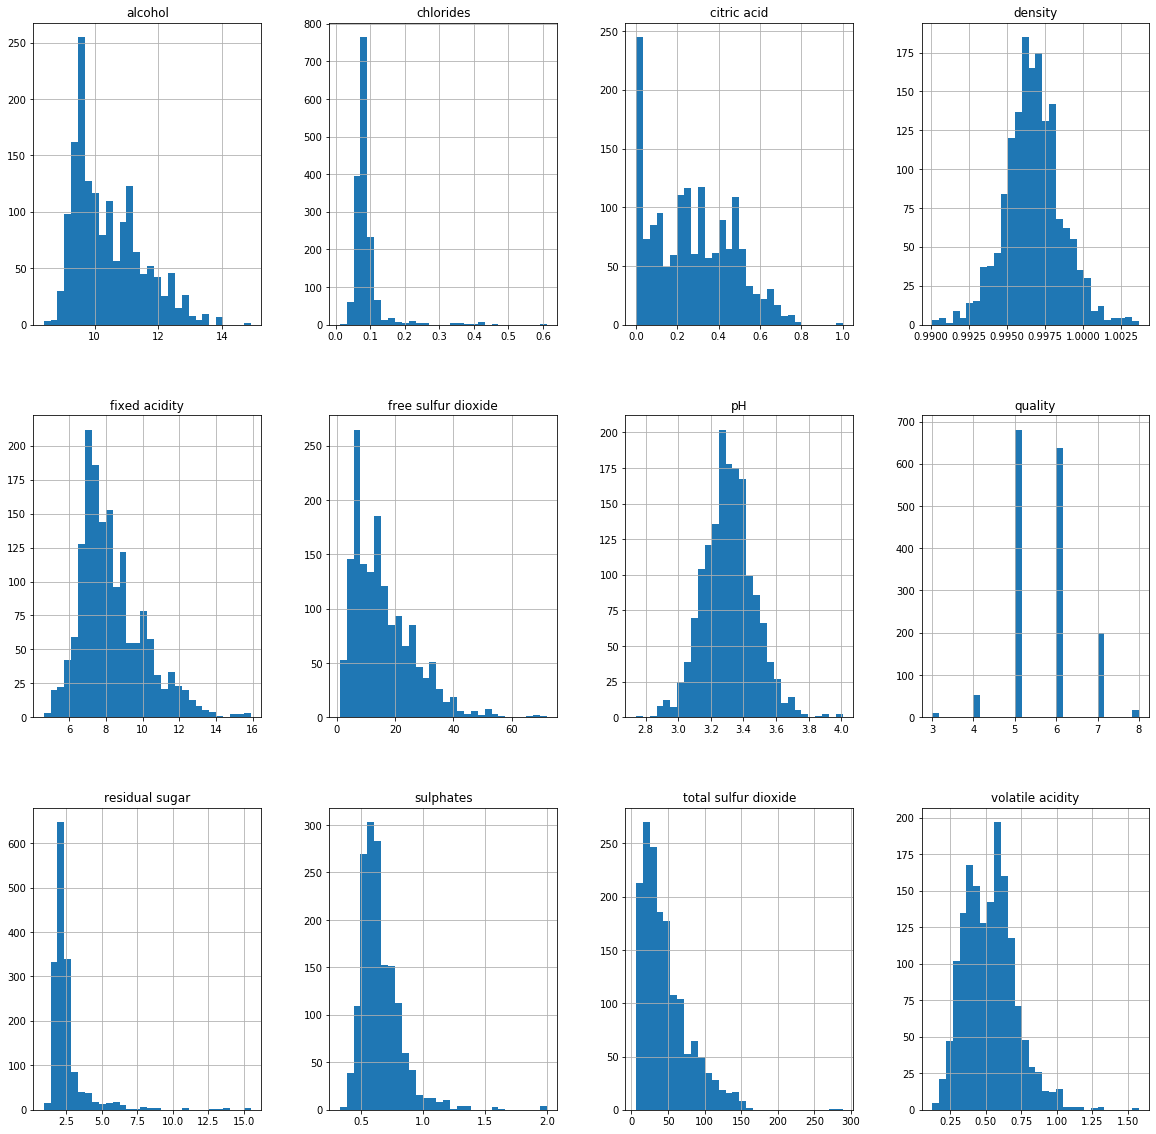

In [8]:
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)

# Checking the Correlation between Features/variables

Let's check the corelation between the target variable and predictor variables

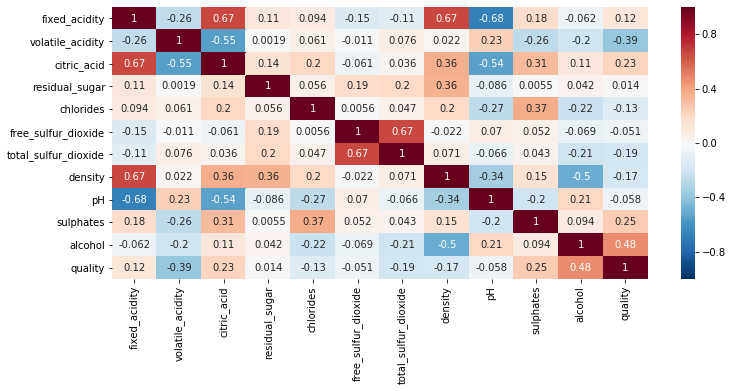

In [48]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [49]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.


This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

# Univariate and Bivariate analysis of Dataset

Let's check how many unique values does the target feature 'quality' has?

In [50]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

And how data is distributed among those values?

In [51]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

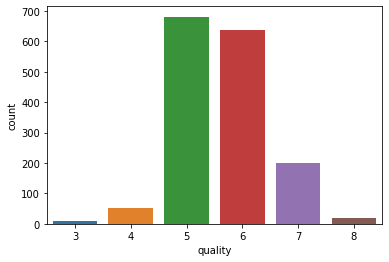

In [52]:
#plotting the graph for visualizing better the distribution of "quality" variable.
sns.countplot(x='quality', data=df)

The above distribution shows the range for response variable (quality) is between 3 to 8.

Lets check for distribution pattern between "quality" and "fixed_acidity" variables

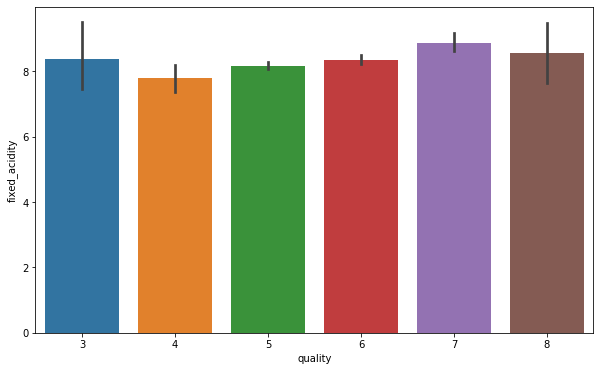

In [53]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = df)

Here we see that fixed acidity does not give any specification to classify the quality.

Lets check the same for "quality" and "volatile_acidity" columns

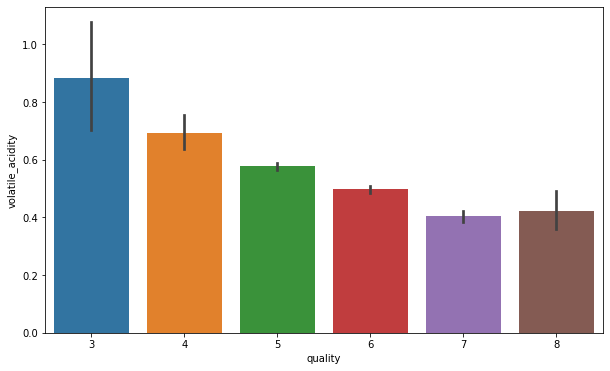

In [54]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = df)

Here we see that its the downing trend in the volatile acidity as we go higher the quality 

Now lets check same for "quality" and "citric_acid" columns

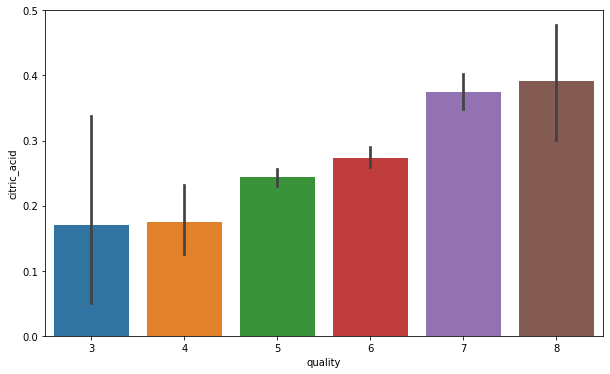

In [55]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = df)

Composition of citric acid go higher as we go higher in the quality of the wine

lets check the same for "quality" and "residual_sugar" column

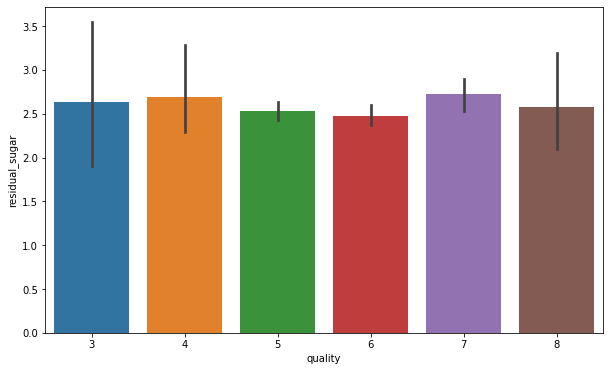

In [56]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = df)

The presence of residual sugar is somewhat impacting the quality of wine

Lets check the same for "quality" and "chlorides" columns

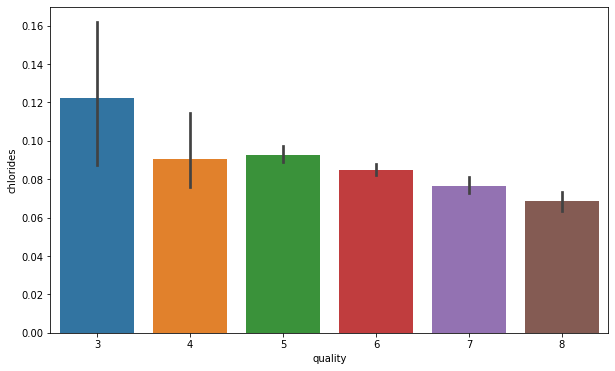

In [57]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

Composition of chloride also go down as we go higher in the quality of the wine

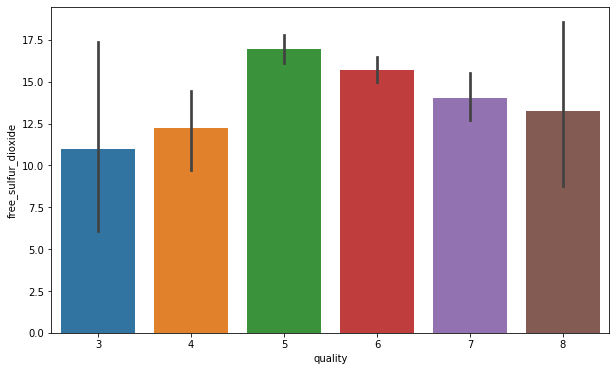

In [58]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = df)

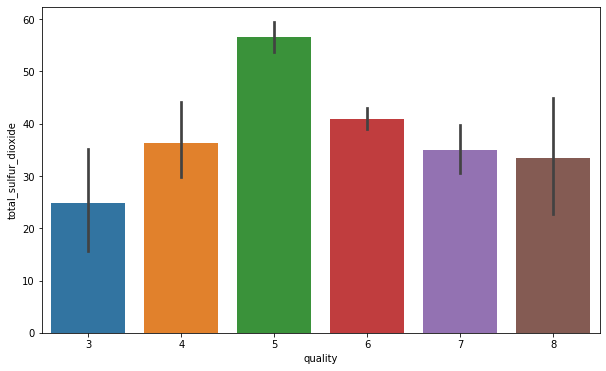

In [59]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = df)

Lets check for "quality" and "sulphates" columns

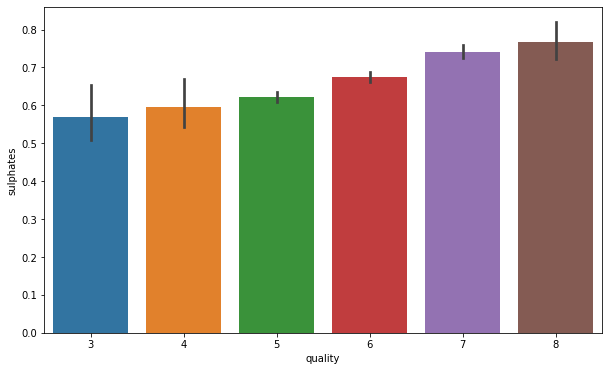

In [60]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

Sulphates level goes higher with the quality of wine

lets check the same for "quality" and "alcohol" variables

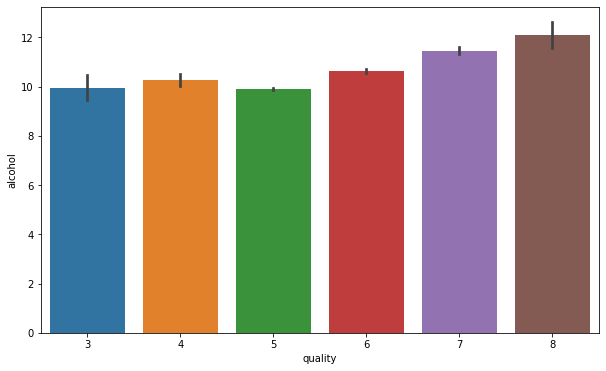

In [61]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Alcohol level also goes higher as te quality of wine increases

# Preprocessing  and cleaning of the Dataset for further analysis

setting an arbitrary cutoff for your dependent variable (wine quality) at 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [62]:
bins = (2, 6.5, 8)
group_names = ['not good', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

# Using Label Encoder to specify labels to target variable "quality"

In [63]:
le= LabelEncoder()
df["quality"]=le.fit_transform(df["quality"])

0 becomes "good" and 1 becomes "not good"

In [64]:
df['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

217 are of good quality
1382 are of not good quality

lets plot them in a graph to visualize it

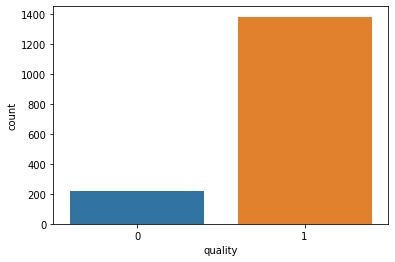

In [65]:
sns.countplot(df['quality'])

# Now performing Train_Test_Split to separate target and input variables

seperating the dataset as response variable and feature variabes

In [66]:
x = df.drop('quality', axis = 1)
y = df['quality']

In [67]:
x.shape

(1599, 11)

In [68]:
y.shape

(1599,)

train test splitting of the data

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [70]:
x_train.shape

(1199, 11)

In [71]:
x_test.shape

(400, 11)

In [72]:
y_train.shape

(1199,)

In [73]:
y_test.shape

(400,)

train-test-split is done

# Applying Standardization Technique to get optimized results through Standard Scaler

In [74]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Our training and testing data is ready now to perform machine learning algorithm

# Model Selection 

The target variable in the given dataset is being converted into classifications hence the problem
becomes classification problem.

Therefore the machine learning algorithms of classification can be applied  here in for training and 
testing of data.

We will check for the best model one by one.

# Applying various Machine Learning Models to Train and test     the Dataset

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [76]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]


In [77]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.885
[[ 16  37]
 [  9 338]]
              precision    recall  f1-score   support

           0       0.64      0.30      0.41        53
           1       0.90      0.97      0.94       347

    accuracy                           0.89       400
   macro avg       0.77      0.64      0.67       400
weighted avg       0.87      0.89      0.87       400


 
0.8475
[[ 34  19]
 [ 42 305]]
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        53
           1       0.94      0.88      0.91       347

    accuracy                           0.85       400
   macro avg       0.69      0.76      0.72       400
weighted avg       0.88      0.85      0.86       400


 
0.8875
[[ 14  39]
 [  6 341]]
              precision    recall  f1-score   support

           0       0.70      0.26      0.38        53
           1       0.90      0.98      0.94       347

    accuracy                           0.89       400
   macro avg       0.80      0.62

# Accuracy Scores for Training and Testing Datasets for various Models--

Accuracy Scores for various  Models----

Logistics Regression-     1.Training=88%
                          2.Testing=89%

Gaussian NB---            1.Training=84.75%
                          2.Testing=85%

SVM----                   1.Training=88.75%
                          2.Testing=89%

Decision Tree Classifier--1.Training=87.75%
                          2.Testing=88%

Random Forest Classifier--1.Training=88.75%
                          2.Testing=89%



# Applying methods to avoid Over Fitting and Under Fitting 

# #GridSearch CV

Finding best parameters for our SVC model

In [78]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [79]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.26      0.38        53
           1       0.90      0.98      0.94       347

    accuracy                           0.89       400
   macro avg       0.80      0.62      0.66       400
weighted avg       0.87      0.89      0.86       400



In [80]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [81]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [82]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}

In [83]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.84      0.40      0.54        53
           1       0.91      0.99      0.95       347

    accuracy                           0.91       400
   macro avg       0.88      0.69      0.74       400
weighted avg       0.90      0.91      0.90       400



accuracy has improved from 89% to 91% using Grid Search CV on SVM Model

In [84]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [85]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        53
           1       0.92      0.96      0.94       347

    accuracy                           0.89       400
   macro avg       0.77      0.70      0.72       400
weighted avg       0.88      0.89      0.88       400



# Cross Validation Score on RFC 

In [86]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9124876727550525

Random forest accuracy increases from 89% to approx  91% using cross validation score.

# Storing the predicted results in csv file.

In [88]:
pred_svc2 = pd.DataFrame(pred_svc2, columns=['pred_svc2']).to_csv('Wine-Quality-Red.csv')

# Saving the best Model as a pickle in a file.

I have selected SVM Model as best model as it is giving me best accuracy score after performing overfitting and
underfitting through Grid Search CV method.

In [89]:
from sklearn.externals import joblib

In [90]:
joblib.dump(svc,'Red_Wine.pkl')

['Red_Wine.pkl']